In [1]:
from sklearn import datasets
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
import pandas as pd
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [3]:
boston_df['PRICE']=boston.target
print(boston_df.shape)
print(boston_df.head())

(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


## 공산성 확인

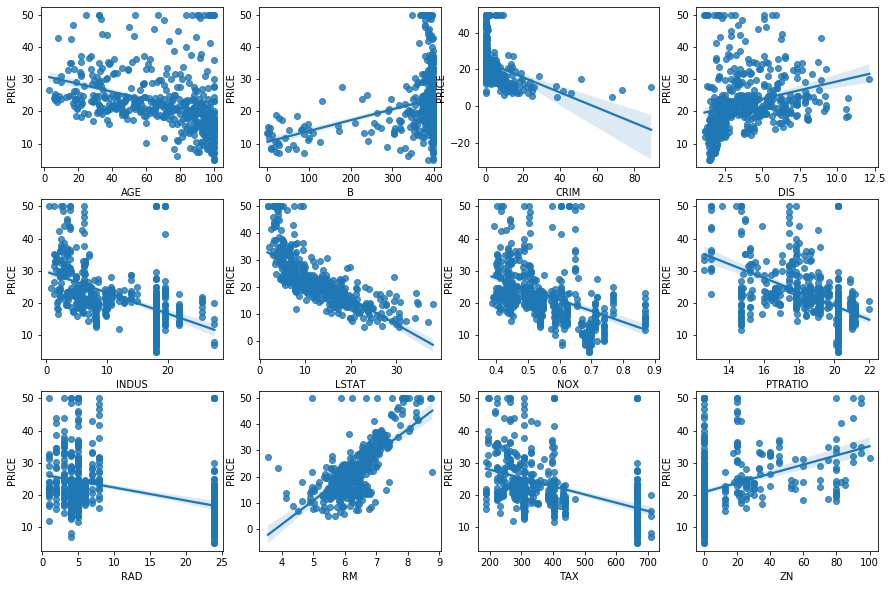

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(15,10),nrows=3,ncols=4)

features = [f for f in list(boston_df.columns)[:-1] if f!='CHAS']
features.sort()

for i , feature in enumerate(features):
    r = int(i/4)
    c = i % 4
    sns.regplot(x=feature,y='PRICE',data=boston_df,ax=axs[r][c])

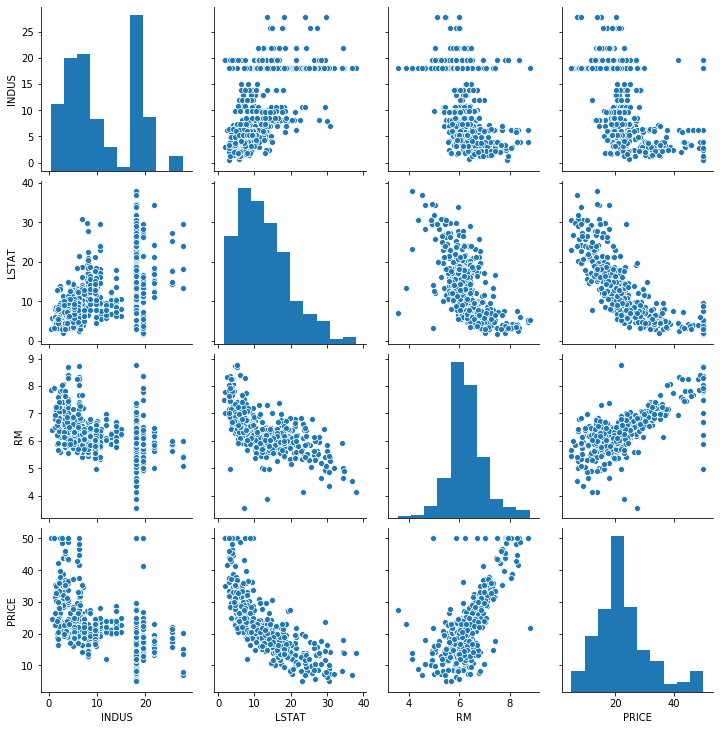

In [5]:
sns.pairplot(boston_df[['INDUS','LSTAT','RM','PRICE']]) # vars= 칼럼 으로 지정 가능 
plt.show()

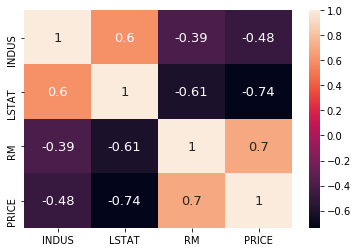

In [6]:
    # 상관계수에 대한 히트맵
corrs = boston_df[['INDUS','LSTAT','RM','PRICE']].corr()
sns.heatmap(corrs,annot=True,annot_kws={'size':13})
    # annot : 맵 위에 값을 표시할지 유무
    # annot_kws : 표시되는 값에 대한 추가 옵션 (크기)
plt.show()

# 다중 선형 회귀분석

In [7]:
from sklearn import model_selection
X = boston_df.drop(["PRICE"],1)
y = boston_df.PRICE

X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X,y, test_size=0.3, random_state=2020)

In [8]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
27,0.95577,0.0,8.14,0.0,0.538,6.047,88.8,4.4534,4.0,307.0,21.0,306.38,17.28
299,0.05561,70.0,2.24,0.0,0.400,7.041,10.0,7.8278,5.0,358.0,14.8,371.58,4.74
327,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5.0,287.0,19.6,396.90,12.79
105,0.13262,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,5.0,384.0,20.9,394.05,16.47
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87


In [9]:
from sklearn import linear_model
from sklearn import metrics
import numpy as np

model = linear_model.LinearRegression().fit(X_train,y_train)

y_pred = model.predict(X_test)

In [10]:
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_pred)
adj_r2 = 1 - ((1-r2)*(len(X_train)-1)  /  (len(X_train)-len(X_train.columns)-1))

In [11]:
print('MSE : %.3f\nRMSE : %.3f\nR2 :% .3f\nadj_R2 :% .3f'%(mse,rmse,r2,adj_r2))

MSE : 23.440
RMSE : 4.842
R2 : 0.699
adj_R2 : 0.688


In [12]:
np.set_printoptions(suppress=True)
    # ndarray의 실수값들을 부동소수점으로 출력되도록 옵션 변경

print('coef of beta : ',np.round(model.coef_,3))
print('intercept : ',np.round(model.intercept_,3))

np.set_printoptions(suppress=False)
    # 원상복귀

coef of beta :  [ -0.116   0.043   0.011   3.339 -14.886   4.267  -0.01   -1.448   0.289
  -0.011  -0.892   0.009  -0.51 ]
intercept :  31.313


In [13]:
pd.Series(np.round(model.coef_,3),index=X.columns).sort_values(ascending=False)

RM          4.267
CHAS        3.339
RAD         0.289
ZN          0.043
INDUS       0.011
B           0.009
AGE        -0.010
TAX        -0.011
CRIM       -0.116
LSTAT      -0.510
PTRATIO    -0.892
DIS        -1.448
NOX       -14.886
dtype: float64

## 스탯츠 모델

In [14]:
import statsmodels.api

addConstant_X_train = statsmodels.api.add_constant(X_train)
model2 = statsmodels.api.OLS(y_train,addConstant_X_train).fit()

addConstant_X_test = statsmodels.api.add_constant(X_test)
y_pred2 = model2.predict(addConstant_X_test)

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     79.38
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.52e-94
Time:                        15:43:42   Log-Likelihood:                -1045.3
No. Observations:                 354   AIC:                             2119.
Df Residuals:                     340   BIC:                             2173.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.3134      6.042      5.182      0.0

## 연습

In [15]:
dbt = datasets.load_diabetes()
print(dbt.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [16]:
X3 = dbt.data
y3 = dbt.target

X_train3, X_test3, y_train3, y_test3 = \
model_selection.train_test_split(X3,y3, test_size=0.3, random_state=2020)

In [17]:
model3 = linear_model.LinearRegression().fit(X_train3,y_train3)
y_pred3 = model3.predict(X_test3)

In [18]:
dbt_mse = metrics.mean_squared_error(y_test3,y_pred3)
dbt_rmse = np.sqrt(dbt_mse)
dbt_r2 = metrics.r2_score(y_test3,y_pred3)
n = len(X_train3) ; k = len(dbt.feature_names)
dbt_adj_r2 = 1 - (1-dbt_r2)*(n-1)/(n-k-1)
print('MSE : %.3f\nRMSE : %.3f\nR2 :% .3f\nadj_R2 :% .3f'%(dbt_mse,dbt_rmse,dbt_r2,dbt_adj_r2))

MSE : 3055.197
RMSE : 55.274
R2 : 0.504
adj_R2 : 0.487


In [19]:
pd.Series(np.round(model3.coef_,3),index=dbt.feature_names).sort_values(ascending=False)

s5     720.644
bmi    522.943
s2     315.016
bp     267.488
s4     153.933
s6     113.352
s3      74.605
age    -52.756
sex   -208.565
s1    -628.346
dtype: float64

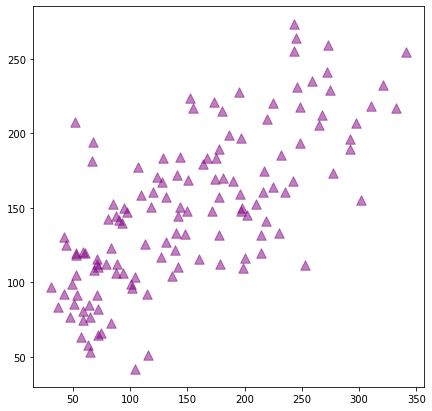

In [26]:
plt.figure(figsize=(7,7)) #사이즈 지정 (정사각형으로)
plt.scatter(y_test3,y_pred3,
            marker="^",s=90, color='purple',alpha=1/2)
plt.show()

## Gradient descent

In [28]:
# LinearRegression() : OLS
# SGDRegressor() : SGD

'0.22.1'

In [30]:
help(linear_model.SGDRegressor)

Help on class SGDRegressor in module sklearn.linear_model._stochastic_gradient:

class SGDRegressor(BaseSGDRegressor)
 |  SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
 |  
 |  Linear model fitted by minimizing a regularized empirical loss with SGD
 |  
 |  SGD stands for Stochastic Gradient Descent: the gradient of the loss is
 |  estimated each sample at a time and the model is updated along the way with
 |  a decreasing strength schedule (aka learning rate).
 |  
 |  The regularizer is a penalty added to the loss function that shrinks model
 |  parameters towards the zero vector using either the squared euclidean norm
 |  L2 or the absolute norm L1 or a combination of both (Elastic Net). If the
 |  pa

In [31]:
sgd_model = linear_model.SGDRegressor(max_iter=10000000,tol=0.0001, eta0=0.01
                                     ).fit(X_train3,y_train3)
y_pred4 = model3.predict(X_test3)

In [32]:
sgd_mse = metrics.mean_squared_error(y_test3,y_pred4)
sgd_rmse = np.sqrt(sgd_mse)
sgd_r2 = metrics.r2_score(y_test3,y_pred4)
n = len(X_train3) ; k = len(dbt.feature_names)
sgd_adj_r2 = 1 - (1-sgd_r2)*(n-1)/(n-k-1)
print('MSE : %.3f\nRMSE : %.3f\nR2 :% .3f\nadj_R2 :% .3f'%(sgd_mse,sgd_rmse,sgd_r2,sgd_adj_r2))

MSE : 3055.197
RMSE : 55.274
R2 : 0.504
adj_R2 : 0.487


In [33]:
pd.Series(np.round(sgd_model.coef_,3),index=dbt.feature_names).sort_values(ascending=False)

bmi    458.418
s5     401.569
bp     244.288
s6     162.541
s4     115.904
age     -5.464
s1     -33.088
s2    -114.819
sex   -153.100
s3    -178.238
dtype: float64

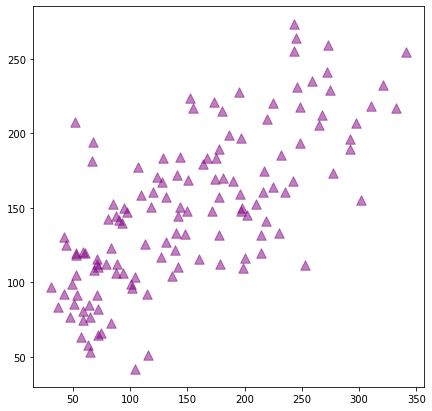

In [34]:
plt.figure(figsize=(7,7)) #사이즈 지정 (정사각형으로)
plt.scatter(y_test3,y_pred4,
            marker="^",s=90, color='purple',alpha=1/2)
plt.show()